In [1]:
from google.colab import files

In [2]:
files.upload()

Saving cardio_train.csv to cardio_train.csv


{'cardio_train.csv': b'id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio\n0;18393;2;168;62.0;110;80;1;1;0;0;1;0\n1;20228;1;156;85.0;140;90;3;1;0;0;1;1\n2;18857;1;165;64.0;130;70;3;1;0;0;0;1\n3;17623;2;169;82.0;150;100;1;1;0;0;1;1\n4;17474;1;156;56.0;100;60;1;1;0;0;0;0\n8;21914;1;151;67.0;120;80;2;2;0;0;0;0\n9;22113;1;157;93.0;130;80;3;1;0;0;1;0\n12;22584;2;178;95.0;130;90;3;3;0;0;1;1\n13;17668;1;158;71.0;110;70;1;1;0;0;1;0\n14;19834;1;164;68.0;110;60;1;1;0;0;0;0\n15;22530;1;169;80.0;120;80;1;1;0;0;1;0\n16;18815;2;173;60.0;120;80;1;1;0;0;1;0\n18;14791;2;165;60.0;120;80;1;1;0;0;0;0\n21;19809;1;158;78.0;110;70;1;1;0;0;1;0\n23;14532;2;181;95.0;130;90;1;1;1;1;1;0\n24;16782;2;172;112.0;120;80;1;1;0;0;0;1\n25;21296;1;170;75.0;130;70;1;1;0;0;0;0\n27;16747;1;158;52.0;110;70;1;3;0;0;1;0\n28;17482;1;154;68.0;100;70;1;1;0;0;0;0\n29;21755;2;162;56.0;120;70;1;1;1;0;1;0\n30;19778;2;163;83.0;120;80;1;1;0;0;1;0\n31;21413;1;157;69.0;130;80;1;1;0;0;1;0\n32;23046;1;158;90.0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cardio_train.csv', sep = ';')

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.shape

(70000, 13)

In [7]:
df = df.drop('id', axis = 1)

In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0




# ```Explatory Data **Analyse**

```



In [9]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [12]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [13]:
import seaborn as sns

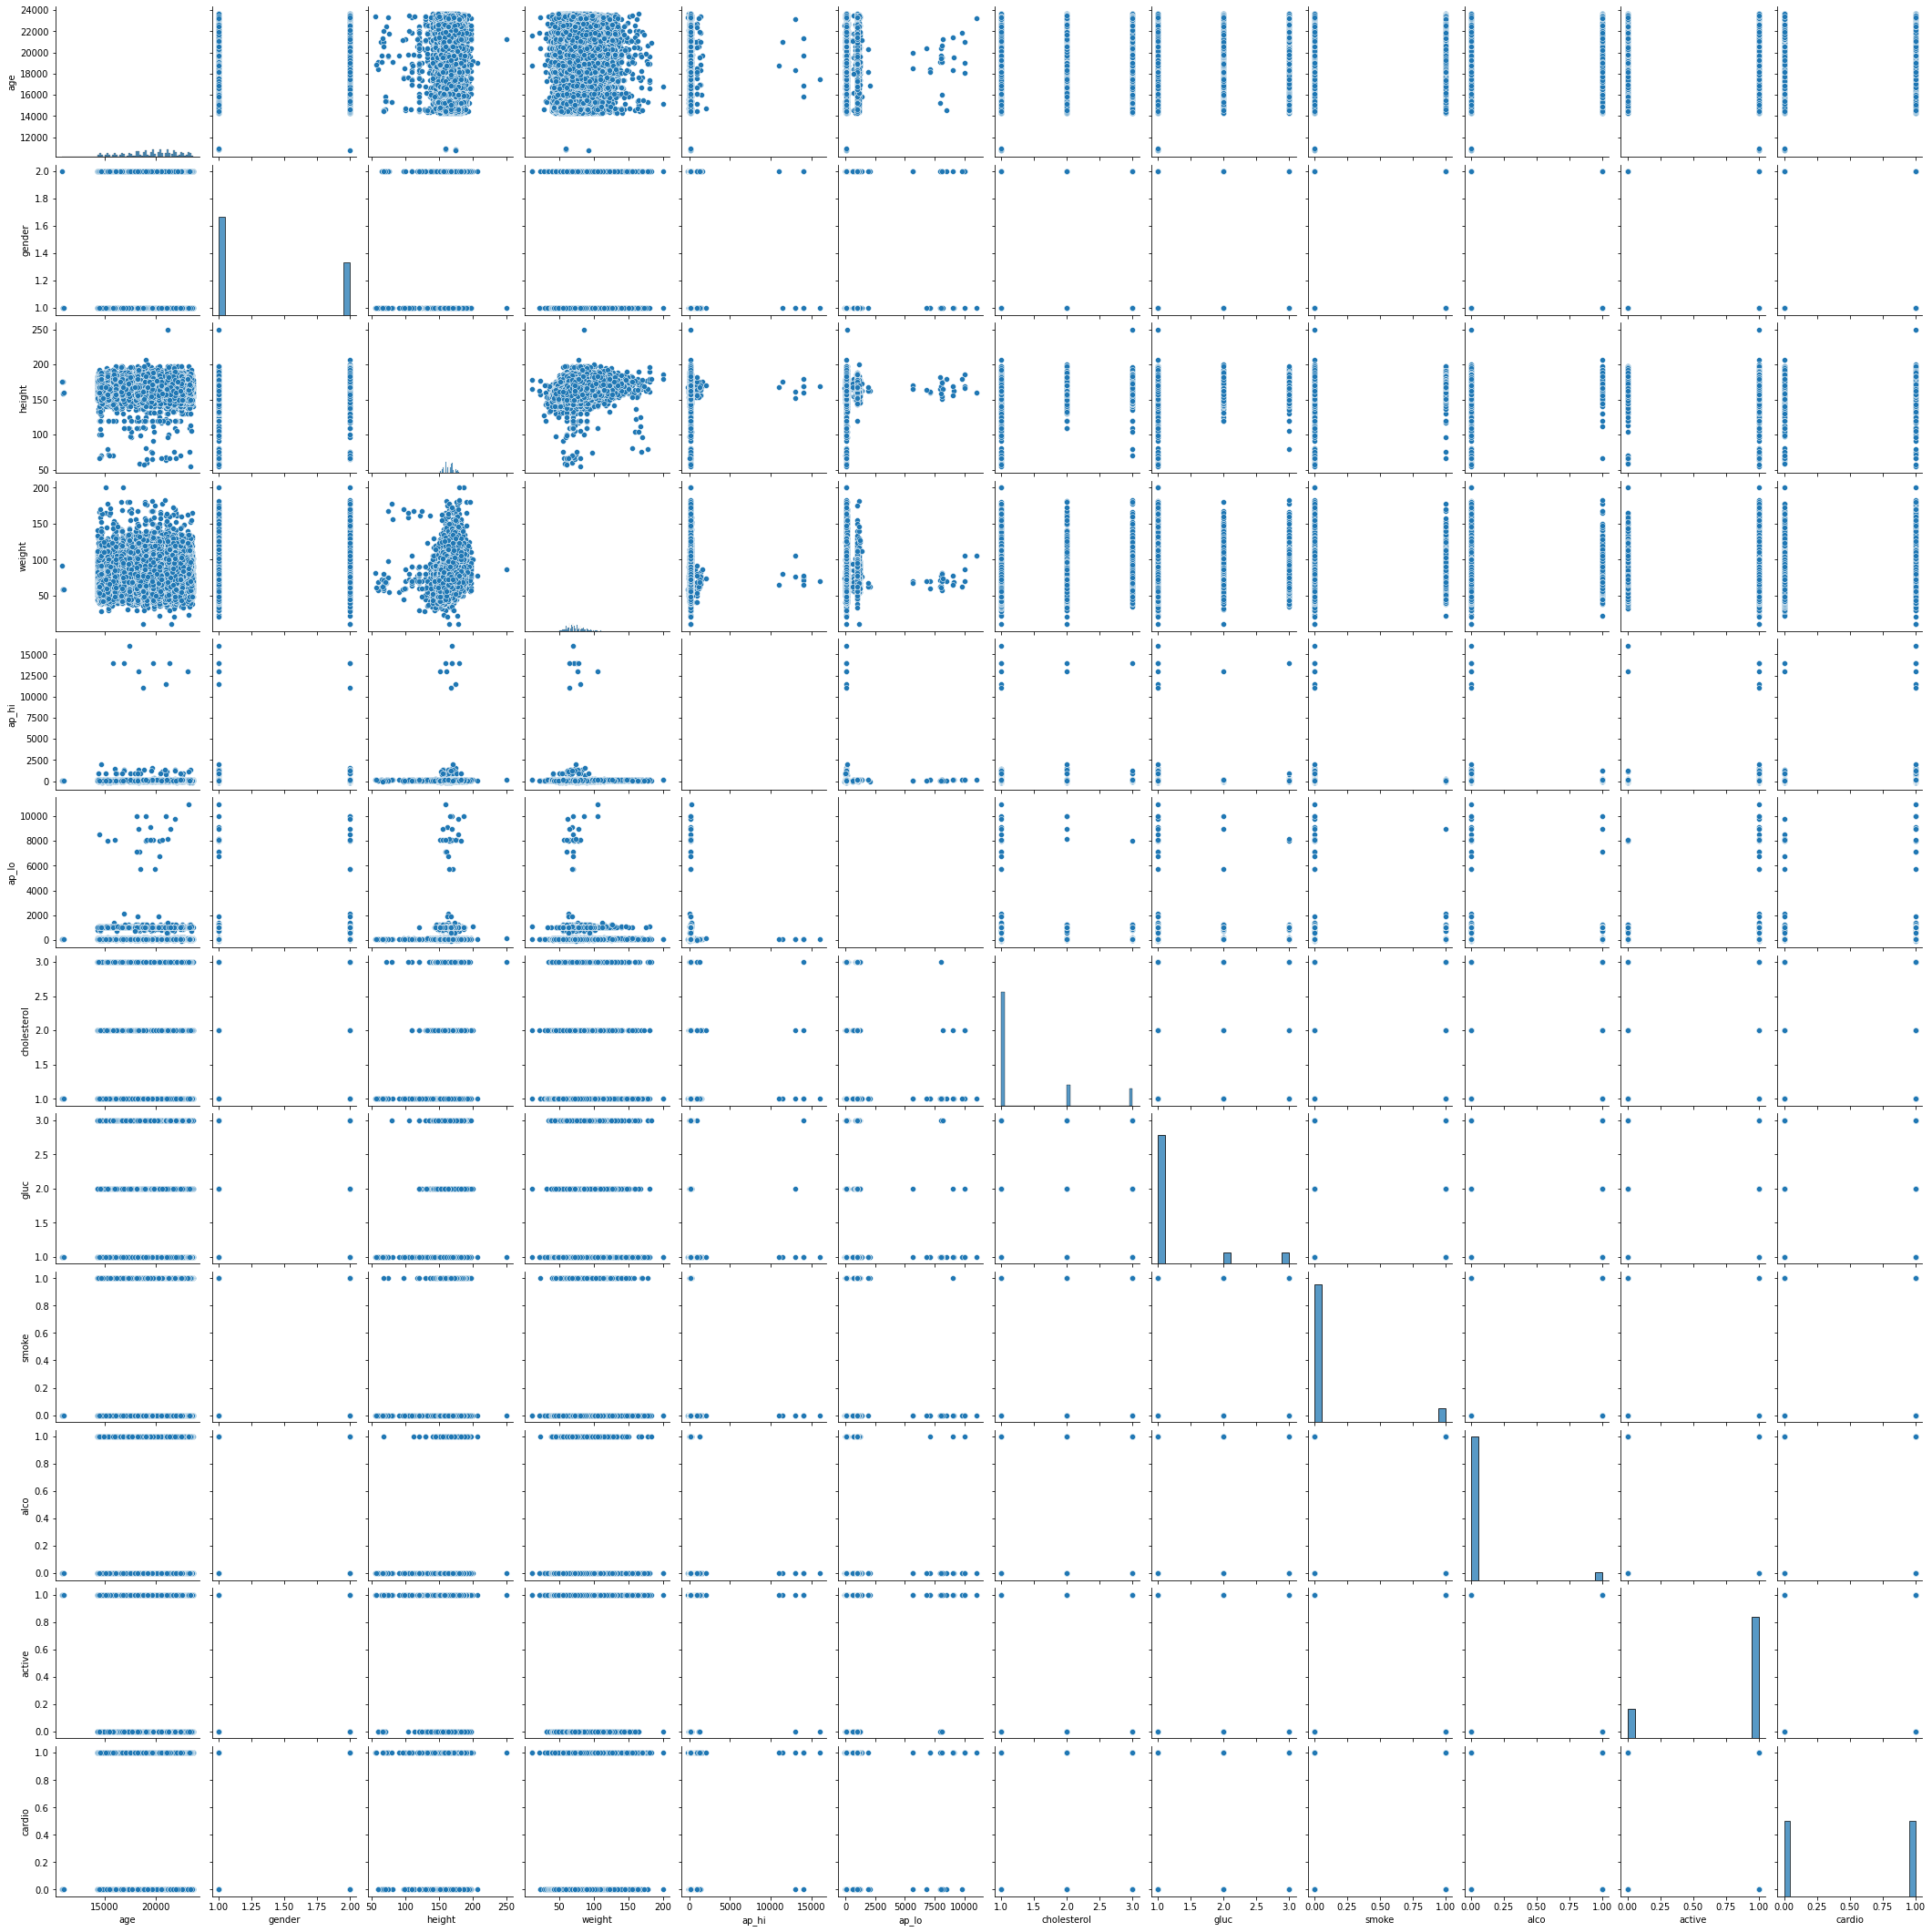

In [14]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


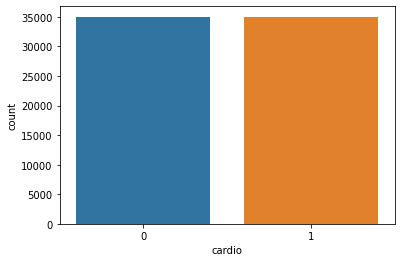

In [15]:
sns.countplot(df['cardio'])

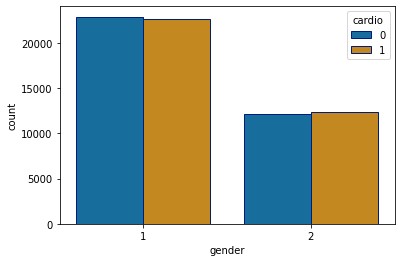

In [16]:
sns.countplot(x = 'gender', hue = 'cardio', data = df, palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1))

In [17]:
df['yr'] = (df['age']/365).round(0)

In [18]:
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

In [19]:
df.drop(['age'], axis = 1)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f16619e50>,
      dtype=object)

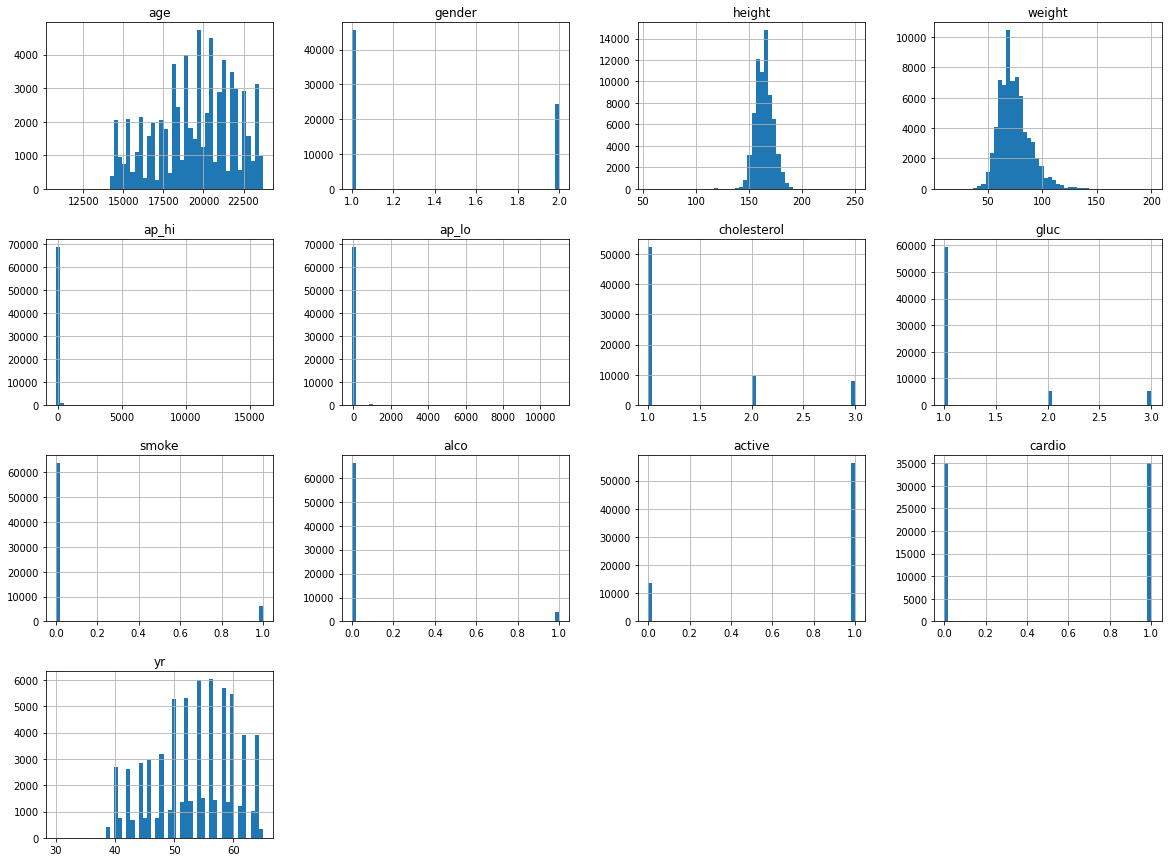

In [22]:
df.hist(bins= 50, figsize= (20, 15))

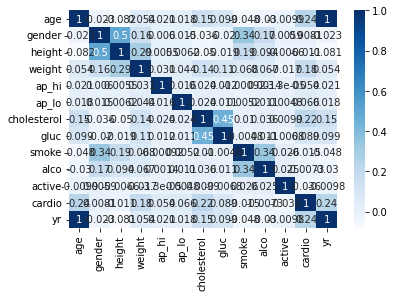

In [24]:
ax = sns.heatmap(data = df.corr(), cmap = 'Blues', annot = True)

In [38]:
x = df[['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'yr']]

In [41]:
x

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
0,2,168,62.0,110,80,1,1,0,0,1,50.0
1,1,156,85.0,140,90,3,1,0,0,1,55.0
2,1,165,64.0,130,70,3,1,0,0,0,52.0
3,2,169,82.0,150,100,1,1,0,0,1,48.0
4,1,156,56.0,100,60,1,1,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,53.0
69996,1,158,126.0,140,90,2,2,0,0,1,62.0
69997,2,183,105.0,180,90,3,1,0,1,0,52.0
69998,1,163,72.0,135,80,1,2,0,0,0,61.0


In [39]:
y = df[['cardio']]

In [40]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


Features **Selection** 

In [29]:
from sklearn.feature_selection import SelectKBest

In [30]:
from sklearn.feature_selection import f_classif

In [31]:
Fit_feature = SelectKBest(score_func = f_classif)

In [42]:
Fit_feature.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest()

In [43]:
score_col = pd.DataFrame(Fit_feature.scores_, columns = ['score values'])

In [44]:
score_col

,score values
0,4.603641
1,8.197397
2,2388.777887
3,208.339524
4,303.629011
5,3599.361137
6,562.772977
7,16.790541
8,3.761355
9,89.091494


In [45]:
Name_col = pd.DataFrame(x.columns)

In [46]:
top_features = pd.concat([Name_col, score_col], axis = 1)

In [47]:
top_features.nlargest(8, 'score values')

,0,score values
10,yr,4193.661786
5,cholesterol,3599.361137
2,weight,2388.777887
6,gluc,562.772977
4,ap_lo,303.629011
3,ap_hi,208.339524
9,active,89.091494
7,smoke,16.790541


In [48]:
x = x[['yr', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'active', 'smoke']]

In [49]:
x

,yr,cholesterol,weight,gluc,ap_lo,ap_hi,active,smoke
0,50.0,1,62.0,1,80,110,1,0
1,55.0,3,85.0,1,90,140,1,0
2,52.0,3,64.0,1,70,130,0,0
3,48.0,1,82.0,1,100,150,1,0
4,48.0,1,56.0,1,60,100,0,0
...,...,...,...,...,...,...,...,...
69995,53.0,1,76.0,1,80,120,1,1
69996,62.0,2,126.0,2,90,140,1,0
69997,52.0,3,105.0,1,90,180,0,0
69998,61.0,1,72.0,2,80,135,0,0


Split Data set into train, test **data**

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

**RandomForestClassifier**

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(n_estimators = 25)

In [54]:
rfc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=25)

In [55]:
rfc.score(x_test, y_test)

0.6901142857142857

**Performances for RandomForest Classifier**

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
pred = rfc.predict(x_test)

In [58]:
accuracy_score(y_test, pred)

0.6901142857142857

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test, pred)

array([[6160, 2449],
       [2974, 5917]])

In [61]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      8609
           1       0.71      0.67      0.69      8891

    accuracy                           0.69     17500
   macro avg       0.69      0.69      0.69     17500
weighted avg       0.69      0.69      0.69     17500



**Support Vector Machine**

In [64]:
from sklearn.svm import SVC

In [65]:
sv = SVC()

In [66]:
sv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

# **Performances for Support Vector Machine**

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
pred1 = sv.predict(x_test)

In [69]:
accuracy_score(y_test, pred1)

0.7190857142857143

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test, pred1)

array([[7095, 1514],
       [3402, 5489]])

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      8609
           1       0.78      0.62      0.69      8891

    accuracy                           0.72     17500
   macro avg       0.73      0.72      0.72     17500
weighted avg       0.73      0.72      0.72     17500



# **KNN Classifier**

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier()

In [77]:
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [78]:
pred2 = knn.predict(x_test)

**Performane for KNN**

In [79]:
accuracy_score(y_test, pred2)

0.6956571428571429

In [80]:
confusion_matrix(y_test, pred2)

array([[6165, 2444],
       [2882, 6009]])

In [81]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      8609
           1       0.78      0.62      0.69      8891

    accuracy                           0.72     17500
   macro avg       0.73      0.72      0.72     17500
weighted avg       0.73      0.72      0.72     17500



# **Naive Bayes**

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
GNB = GaussianNB()

In [84]:
GNB.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [85]:
pred3 = GNB.predict(x_test)

**Performance for Naive Bayes**

In [86]:
accuracy_score(y_test, pred3)

0.5802285714285714

In [89]:
confusion_matrix(y_test, pred3)

array([[7734,  875],
       [6471, 2420]])

In [90]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      8609
           1       0.78      0.62      0.69      8891

    accuracy                           0.72     17500
   macro avg       0.73      0.72      0.72     17500
weighted avg       0.73      0.72      0.72     17500



# **Bernoulli Naive Bayes**

In [91]:
from sklearn.naive_bayes import BernoulliNB

In [92]:
BNB = BernoulliNB()

In [93]:
BNB.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

**Performance for Bernoulli Naive Bayes**

In [94]:
pred4 = BNB.predict(x_test)

In [95]:
accuracy_score(y_test, pred4)

0.5081142857142857